# Nonlinear least squares

In [10]:
using Random
using Statistics
using LinearAlgebra
using ForwardDiff
using Plots

In [11]:
r(x) = [ ρ[i] - norm(x - b[:,i]) for i=1:m ]
A(x) = ForwardDiff.jacobian(r,x);

In [12]:
Random.seed!(1)
m = 10
b = randn(2,m)            # vector of beacon positions
xt = mean(b,dims=2)[:]          # define true x position as the mean
v = .5*randn(m)           # random error
ρ = [ norm(xt - b[:,i]) + v[i] for i=1:m];

In [13]:
function gn(r, A, x; maxits=20)
    xk = copy(x)
    for i = 1:maxits
        global rk = r(xk)
        Ak = A(xk)
        bk = Ak*xk - rk
        xk = Ak\bk
        println("norm(rk) = $(norm(rk))")
    end
    
    return xk
end;

In [14]:
x0 = rand(2)
x = gn(r, A, x0);

norm(rk) = 3.397065258190326
norm(rk) = 2.1105046955646563
norm(rk) = 1.4933012297276602
norm(rk) = 1.4350542330146505
norm(rk) = 1.4316372393075756
norm(rk) = 1.4307761699530348
norm(rk) = 1.4304220057817256
norm(rk) = 1.4303011709825608
norm(rk) = 1.4302531492389676
norm(rk) = 1.430235601198724
norm(rk) = 1.430228822208036
norm(rk) = 1.4302262880183398
norm(rk) = 1.4302253208006703
norm(rk) = 1.4302249562565654
norm(rk) = 1.4302248177823913
norm(rk) = 1.4302247654329674
norm(rk) = 1.4302247455840364
norm(rk) = 1.4302247380716988
norm(rk) = 1.430224735225284
norm(rk) = 1.4302247341475214


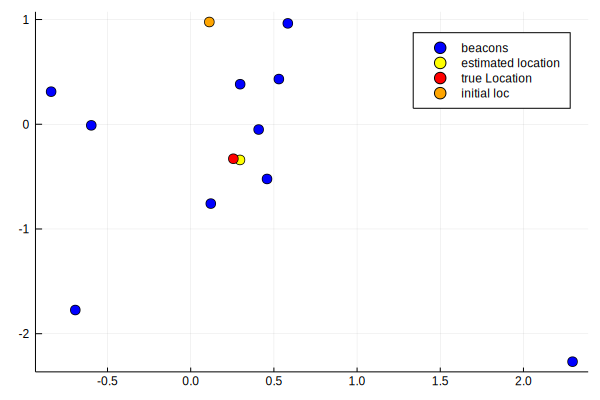

In [15]:
scatter(b[1,:],b[2,:],color="blue", label = "beacons", ms = 5)
scatter!([x[1]],[x[2]],color="yellow", label = "estimated location", ms = 5)
scatter!(xt[[1]],[xt[2]],color="red", label = "true Location", ms = 5)
scatter!(x0[[1]],[x0[2]],color="orange", label = "initial loc", ms = 5)


## Damped Gauss Newton

In [16]:
function dgn(r, A, x, α; maxits=20)
    xk = copy(x)
    for i = 1:maxits
        global rk = r(xk)
        Ak = A(xk)
        zk = Ak\rk
        xk = xk-α*zk
    end
    println("norm(rk) = $(norm(rk))")
    return xk
end;

In [17]:
dx = dgn(r, A, x0, 1);

norm(rk) = 1.4302247341475216


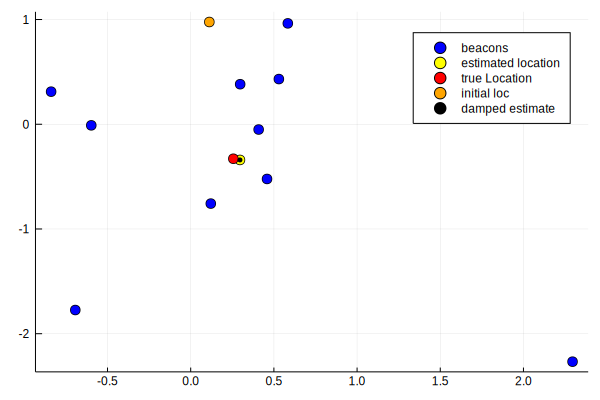

In [18]:
scatter(b[1,:],b[2,:],color="blue", label = "beacons", ms = 5)
scatter!([x[1]],[x[2]],color="yellow", label = "estimated location", ms = 5)
scatter!(xt[[1]],[xt[2]],color="red", label = "true Location", ms = 5)
scatter!(x0[[1]],[x0[2]],color="orange", label = "initial loc", ms = 5)
scatter!(dx[[1]],[dx[2]],color="black", label = "damped estimate", ms = 2)
